In [2]:
!pip list

Package            Version
------------------ -----------
accelerate         0.28.0
aiohttp            3.9.3
aiosignal          1.3.1
appnope            0.1.4
asttokens          2.4.1
attrs              23.2.0
beautifulsoup4     4.12.3
blinker            1.8.2
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
comm               0.2.2
contourpy          1.2.1
cycler             0.12.1
datasets           2.18.0
debugpy            1.8.1
decorator          5.1.1
dill               0.3.8
dnspython          2.6.1
evaluate           0.4.1
executing          2.0.1
filelock           3.13.1
Flask              3.0.3
Flask-Cors         4.0.1
Flask-Login        0.6.3
Flask-SQLAlchemy   3.1.1
Flask-WTF          1.2.1
fonttools          4.53.0
frozenlist         1.4.1
fsspec             2024.2.0
huggingface-hub    0.21.4
idna               3.6
ipykernel          6.29.3
ipython            8.22.2
itsdangerous       2.2.0
jedi               0.19.1
Jinja2             3.1.3
jo

In [3]:
import torch

In [4]:
my_torch = torch.arange(15)

In [5]:
my_torch = my_torch.view(-1,3)

In [6]:
my_torch

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [7]:
my_torch[:,1]

tensor([ 1,  4,  7, 10, 13])

In [9]:
my_torch

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [49]:
torch.cuda.is_available()

True

In [11]:
torch.mul(my_torch, my_torch)

tensor([[  0,   1,   4],
        [  9,  16,  25],
        [ 36,  49,  64],
        [ 81, 100, 121],
        [144, 169, 196]])

In [12]:
my_torch.add(my_torch)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22],
        [24, 26, 28]])

In [13]:
my_torch_1 = torch.arange(15)

In [17]:
my_torch_1 = my_torch_1.view(-1,3)

In [18]:
my_torch_1

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [19]:
my_torch_1.add_(my_torch_1)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22],
        [24, 26, 28]])

In [21]:
my_torch_1.add_(my_torch)

tensor([[ 0,  3,  6],
        [ 9, 12, 15],
        [18, 21, 24],
        [27, 30, 33],
        [36, 39, 42]])

In [22]:
my_torch

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [71]:
import torch.nn as nn
import torch.nn.functional as F

In [79]:
class Model(nn.Module):
    def __init__(self, input_features=4, h1=8, h2=9, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,output_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [80]:
torch.manual_seed(41)
model = Model()

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [82]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [88]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [89]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [91]:
df['variety'] = df['variety'].replace({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0}).astype(float)


In [92]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [93]:
X = df.drop('variety',axis=1)

In [94]:
Y = df['variety']

In [95]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: variety, dtype: float64

In [96]:
X = X.values

In [97]:
Y = Y.values

In [98]:
from sklearn.model_selection import  train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=41)

In [100]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [101]:
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [102]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [103]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [104]:
epochs = 100
losses = []
for i in range(epochs):
    Y_pred = model.forward(X_train)
    loss = criterion(Y_pred,Y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003390073776245
Epoch: 50 and loss: 0.2679471969604492
Epoch: 60 and loss: 0.1796349734067917
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651433467865
Epoch: 90 and loss: 0.06522615998983383


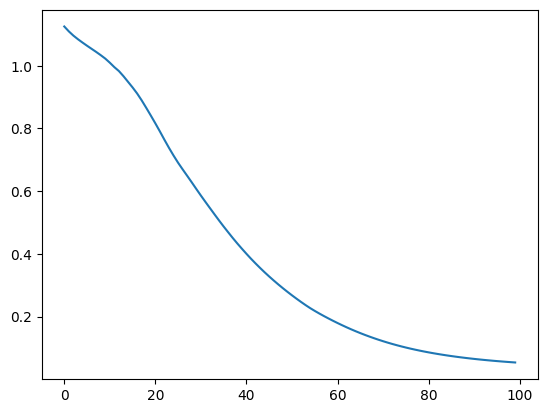

In [105]:
plt.plot(range(epochs), losses)

In [112]:
with torch.no_grad():
    Y_eval = model.forward(X_test)
    loss = criterion(Y_eval,Y_test)
loss

tensor(0.1315)

In [111]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        Y_val = model.forward(data)
        print(f'{i+1}.) {str(Y_val)} \t {Y_test[i]}')
        if Y_val.argmax().item() == Y_test[i]:
            correct+=1
    print(correct)

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1
5.) tensor([-7.1838,  4.8757,  8.3024]) 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0
21.) tensor([-2.6161,  4.5584,  0.8575]) 	 1
22.) tensor([-7.7427,  4.7379,  9.4233]) 	 2
23.) tensor([ 3.577

In [119]:
new_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [120]:
with torch.no_grad():
    Y_eval = model.forward(new_iris)
    print(Y_eval)

tensor([-5.9960,  4.5080,  6.6831])


In [121]:
torch.save(model.state_dict(), 'my_basic_iris_model.pt')

In [122]:
new_model = Model()
new_model.load_state_dict(torch.load('my_basic_iris_model.pt'))

<All keys matched successfully>

In [123]:
new_model.eval

<bound method Module.eval of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>